# Logistic Regression

Example - customer sent an email, according to age, did they take action or not?

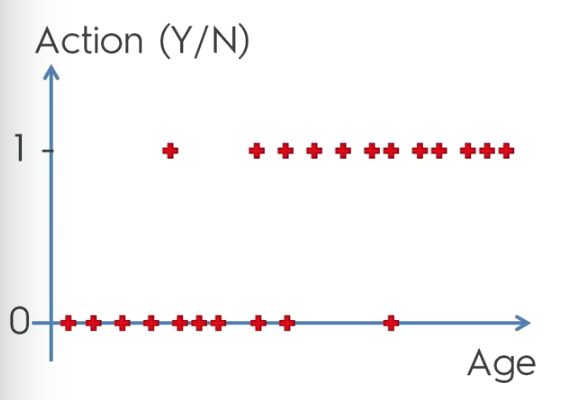

Can see that older people are more likely to take action based on offer.

**Key idea** - predict likelihood/probability of a person taking up an offer.

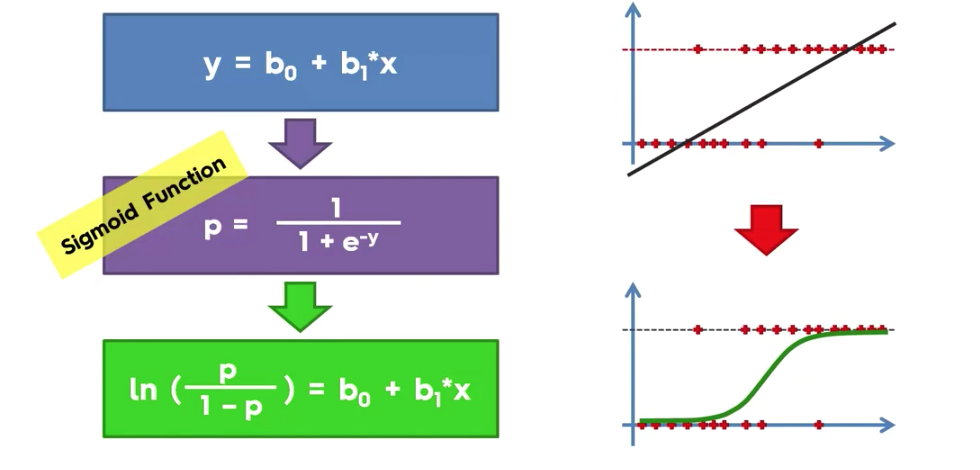

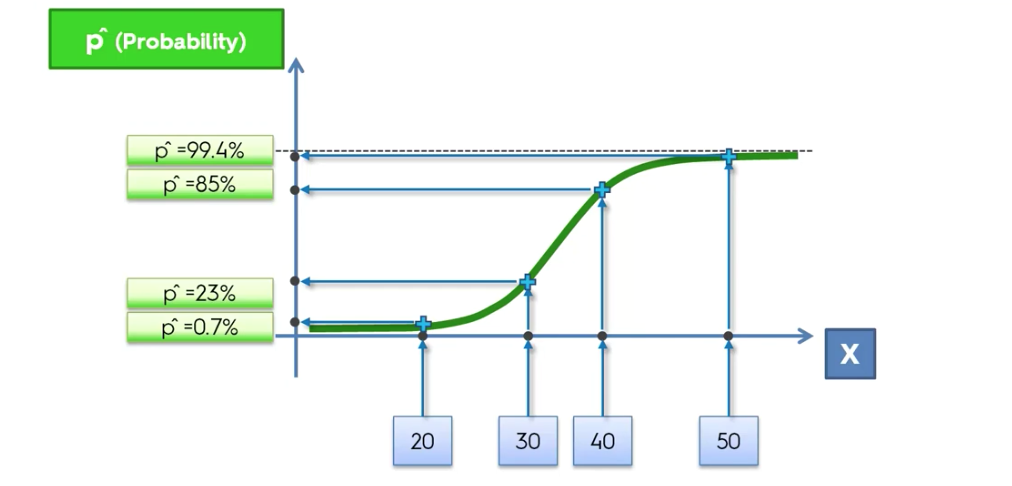

- using linear regression would provide value of P(Y=1|X=x) outside of 0 to 1
- so we choose different model to ensure P(Y=1|X=x) is between 0 and 1:

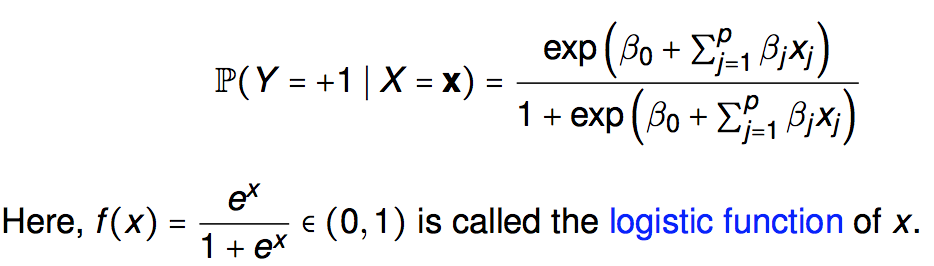

- we can choose a threshold e.g. 50%, that classifies 0 (below 50%) and 1 (above 50%)

- model can be rearranged and equivalently stated as:

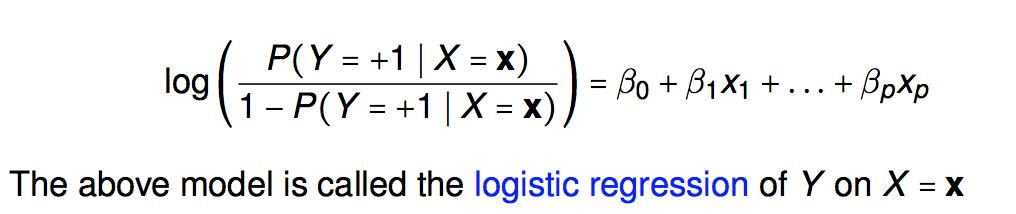

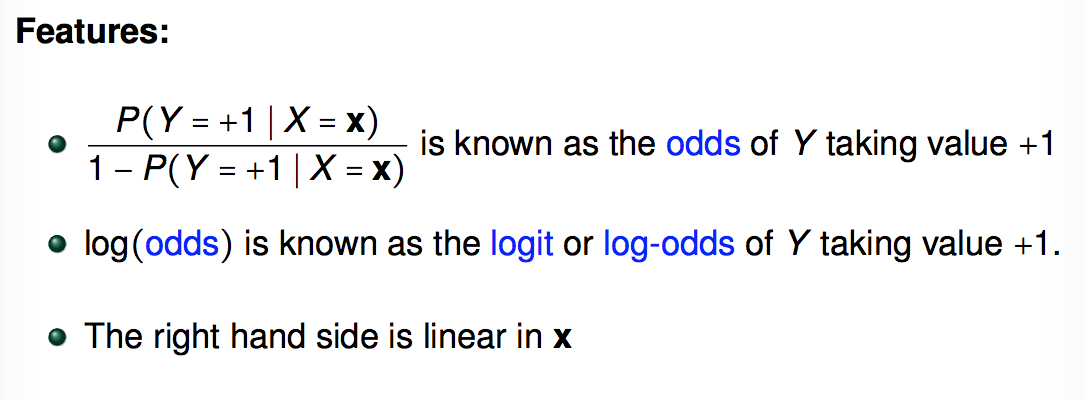

- holding all other variables constant, increasing $$x_{j}$$ by one unit changes the log(odds) of Y=1 by $$B_{j}$$
- equivalently, increasing $$x_{j}$$ by one unit multiplies the odds of Y=1 by $$e^{B_{j}}$$
- e.g.: p=0.8 and 1-p=0.2; (p/1-p) = 0.8/0.2 = 4
    - probability of success is 4 to 1 (4x out of 5 the process is expected to be a success; 1x out of 5 process is expected to be a failure
    

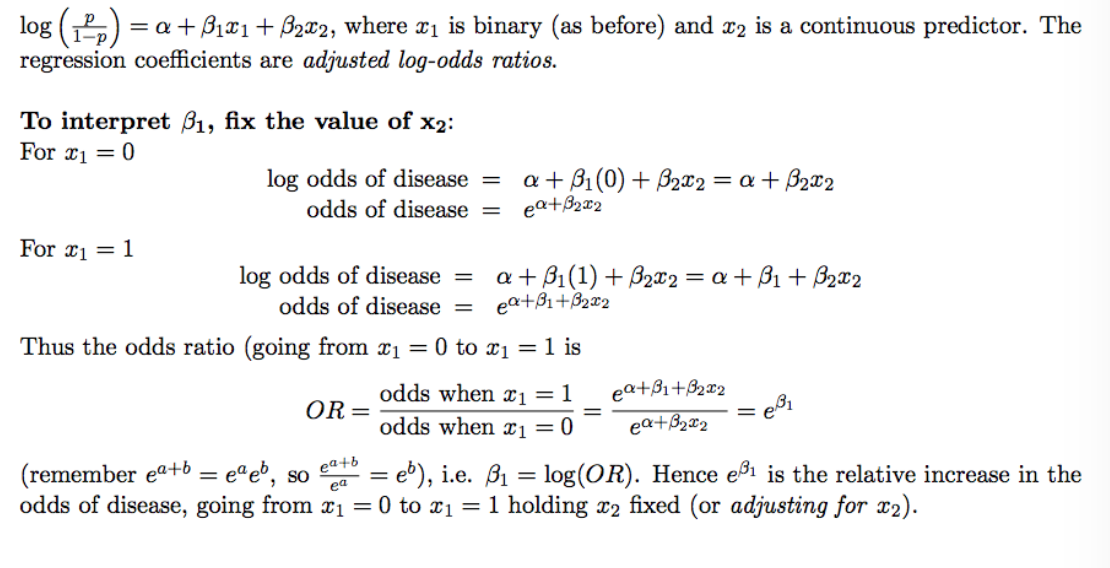

https://www.unm.edu/~schrader/biostat/bio2/Spr06/lec11.pdf

**Interpretation of Parameter Estimates:**

- exp(β0) = the odds that the characteristic is present in an observation i when Xi = 0, i.e., at baseline.
- exp(β1) = for every unit increase in Xi1, the odds that the characteristic is present is multiplied by exp(β1). This is similar to simple linear regression but instead of additive change it is a multiplicative change in rate. This is an estimated odds ratio.
$$\frac{exp(β_{0}+β_{1}(x_{i1}+1))}{exp(β_{0}+β_{1}x_{i1})}=exp(β_{1})$$
- In general, the logistic model stipulates that the effect of a covariate on the chance of "success" is linear on the log-odds scale, or multiplicative on the odds scale.

- If βj > 0, then exp(βj) > 1, and the odds increase.
- If βj < 0,then exp(βj) < 1, and the odds decrease.

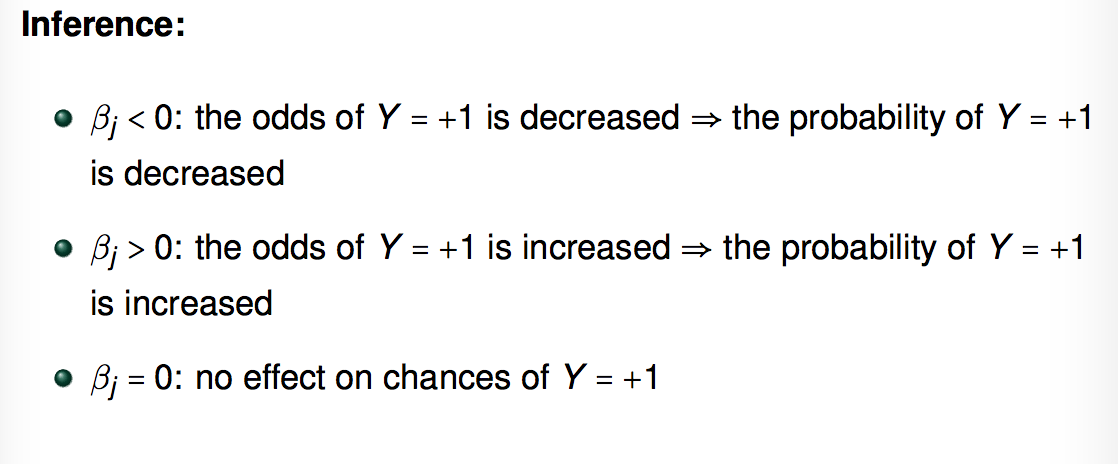

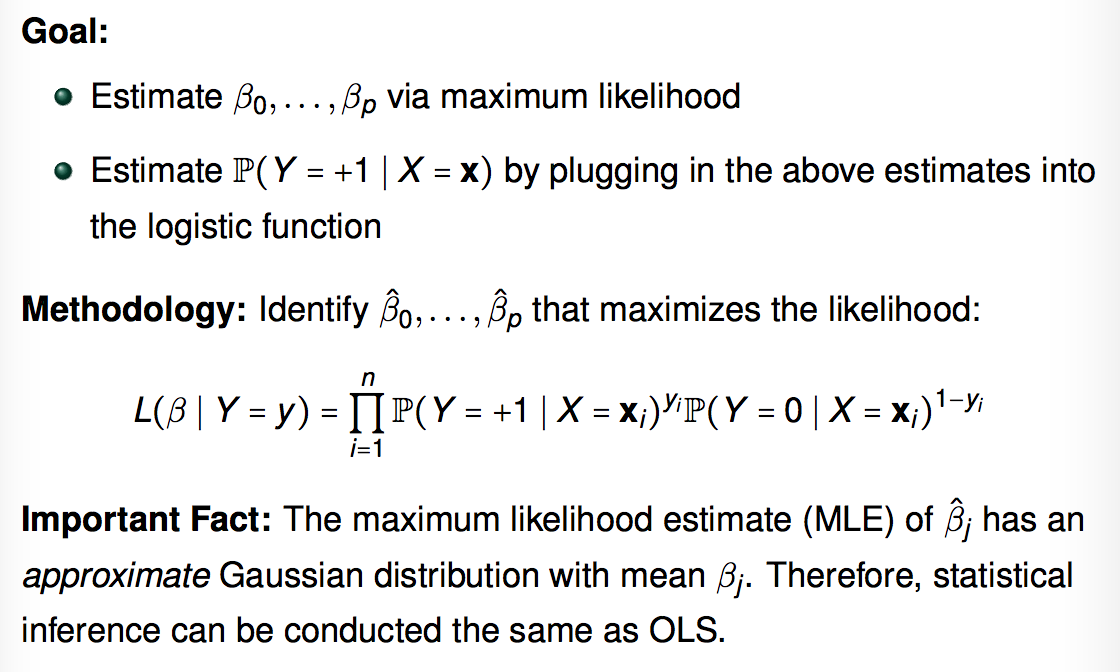

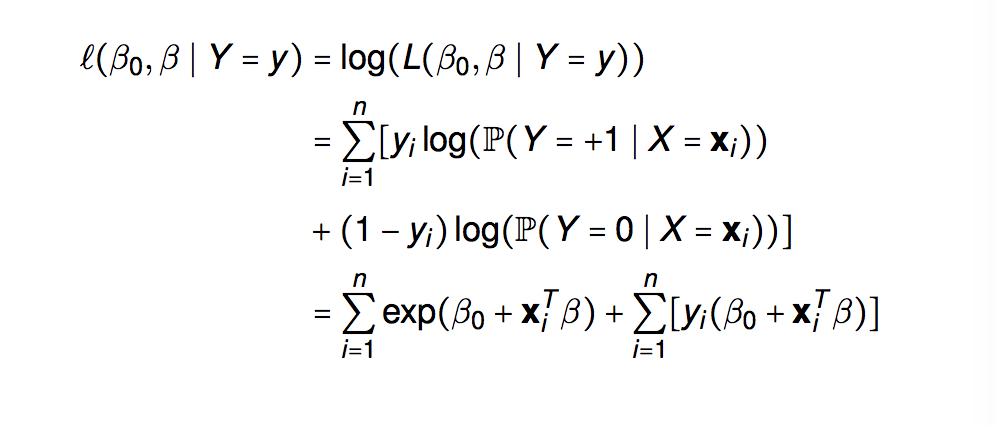

- there is no analytical form for $$\hat{B}$$ that maximizes log-likelihood (unlike OLS for standard regression)
- must resort to computational means using methods e.g.:
    - Gradient descent methods for each Bj
    - Fisher scoring algorithm

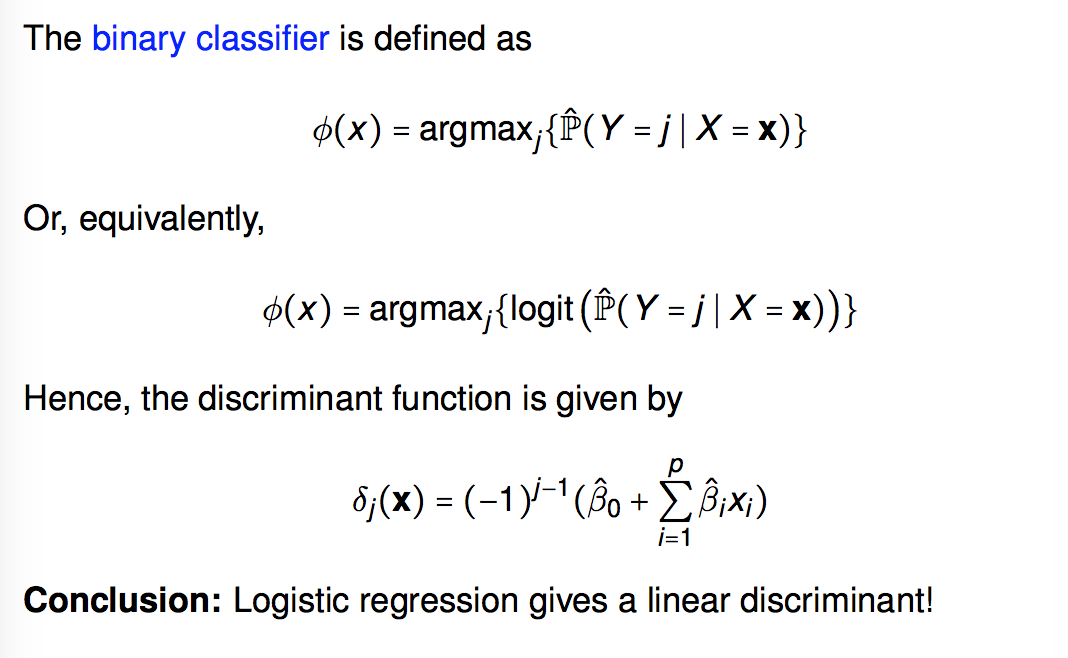

Assumptions:

- The data Y1, Y2, ..., Yn are independently distributed
- Distribution of Yi is Bin(ni, πi). The dependent variable does NOT need to be normally distributed, but it typically assumes a distribution from an exponential family (e.g. binomial, Poisson, multinomial, normal,...)
- Does NOT assume a linear relationship between the dependent variable and the independent variables, but it does assume linear relationship between the logit of the response and the explanatory variables; logit(π) = β0 + βX.
- Independent (explanatory) variables can be even the power terms or some other nonlinear transformations of the original independent variables.
- The homogeneity of variance does NOT need to be satisfied. In fact, it is not even possible in many cases given the model structure.
- Errors need to be independent but NOT normally distributed.
- It uses maximum likelihood estimation (MLE) rather than ordinary least squares (OLS) to estimate the parameters, and thus relies on large-sample approximations.
- Goodness-of-fit measures rely on sufficiently large samples, where a heuristic rule is that not more than 20% of the expected cells counts are less than 5.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
#seperate x and y
X = dataset.iloc[:, [2,3]].values #age and est. salary
y = dataset.iloc[:, 4].values

In [13]:
#seperate train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
#fit logistics regression to training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) #random state to get same result
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
#predict
y_pred = classifier.predict(X_test)

In [17]:
#making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]])

In [28]:
#look at results on a graph to clearly see regions logistics regression will buy/not buy product
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
#create pixels with 0.01 resolution (steps)
#max-min of age with some space on left and right (+/- 1)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#max-min of est. salary
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#apply logistics regression to predict whether pixel point is red or green
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

(-2.5825424477554764, 3.3274575522443977)

In [34]:
X1

array([[-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
         3.14681084,  3.15681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
         3.14681084,  3.15681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
         3.14681084,  3.15681084],
       ..., 
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
         3.14681084,  3.15681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
         3.14681084,  3.15681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
         3.14681084,  3.15681084]])

In [43]:
X2

array([[-2.58254245, -2.58254245, -2.58254245, ..., -2.58254245,
        -2.58254245, -2.58254245],
       [-2.57254245, -2.57254245, -2.57254245, ..., -2.57254245,
        -2.57254245, -2.57254245],
       [-2.56254245, -2.56254245, -2.56254245, ..., -2.56254245,
        -2.56254245, -2.56254245],
       ..., 
       [ 3.30745755,  3.30745755,  3.30745755, ...,  3.30745755,
         3.30745755,  3.30745755],
       [ 3.31745755,  3.31745755,  3.31745755, ...,  3.31745755,
         3.31745755,  3.31745755],
       [ 3.32745755,  3.32745755,  3.32745755, ...,  3.32745755,
         3.32745755,  3.32745755]])

In [42]:
X1.ravel() #return a contiguous flattened array

array([-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
        3.14681084,  3.15681084])

In [41]:
X2.ravel()

array([-2.58254245, -2.58254245, -2.58254245, ...,  3.32745755,
        3.32745755,  3.32745755])

In [37]:
np.array([X1.ravel(), X2.ravel()])

array([[-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
         3.14681084,  3.15681084],
       [-2.58254245, -2.58254245, -2.58254245, ...,  3.32745755,
         3.32745755,  3.32745755]])

In [36]:
np.array([X1.ravel(), X2.ravel()]).T

array([[-2.99318916, -2.58254245],
       [-2.98318916, -2.58254245],
       [-2.97318916, -2.58254245],
       ..., 
       [ 3.13681084,  3.32745755],
       [ 3.14681084,  3.32745755],
       [ 3.15681084,  3.32745755]])

In [44]:
np.array([X1.ravel(), X2.ravel()]).T.shape

(364672, 2)

In [50]:
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)

array([0, 0, 0, ..., 1, 1, 1])

In [46]:
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).shape

(364672,)

In [51]:
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ..., 
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [49]:
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape).shape

(592, 616)

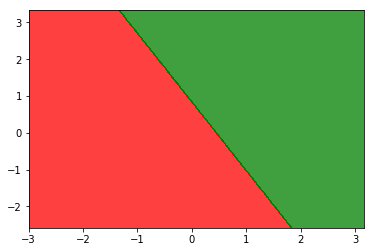

In [29]:
plt.show()

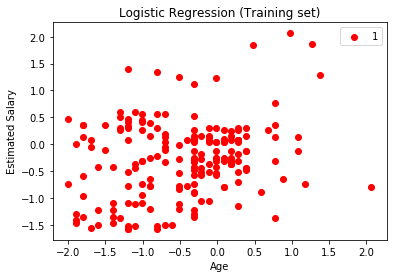

In [23]:
#plot all the real data points

plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1],
                c = ListedColormap(('red', 'green'))(0), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

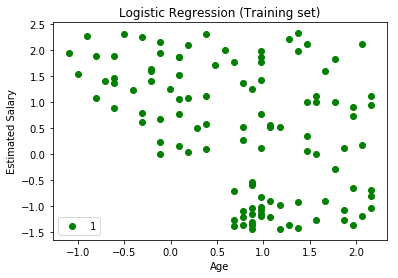

In [22]:
#plot all the real data points

plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1],
                c = ListedColormap(('red', 'green'))(1), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

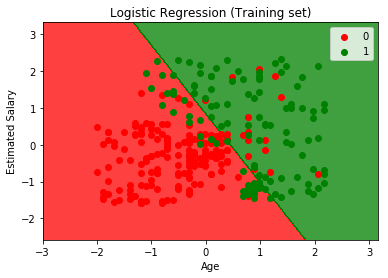

In [27]:
#plot all the real data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

We can see prediction regions above...
- can optimize social network ad to those in green region
- straight line is called 'prediction boundary'
- if straight line boundary, it means logistics regression is linear classifier
- in 3D, it would be straight plane sepearting 2 spaces

Parameters:
- penalty: l1 or l2 (default is l2) 
- C: inverse of regularization strength - smaller values specify stronger regularization (default 1.0)
- fit_intercept: specifies if constant (bias/intercept) should be added to decision function
- max_iter: max number of iterations taken for solver to converge
- solver: newton-cg, lbfgs, liblinear, sag, saga
- n_jobs: number of CPU cores used when parallelizing over classes; when -1, all cores of computer are used

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Regularization: is a technique used in an attempt to solve the overfitting problem in statistical models

- You penalize your loss function by adding a multiple of an L1L1 (LASSO[2]) or an L2L2 (Ridge[3]) norm of your weights vector ww (it is the vector of the learned parameters in your linear regression). You get the following equation:

$$L(X,Y)+λN(w)L(X,Y)+λN(w)$$

- (NN is either the L1L1, L2L2 or any other norm)

- This will help you avoid overfitting and will perform, at the same time, features selection for certain regularization norms (the L1L1 in the LASSO does the job).

- Finally you might ask: OK I have everything now. How can I tune in the regularization term λλ?

- One possible answer is to use cross-validation: you divide your training data, you train your model for a fixed value of λ and test it on the remaining subsets and repeat this procedure while varying λ. Then you select the best λ that minimizes your loss function.

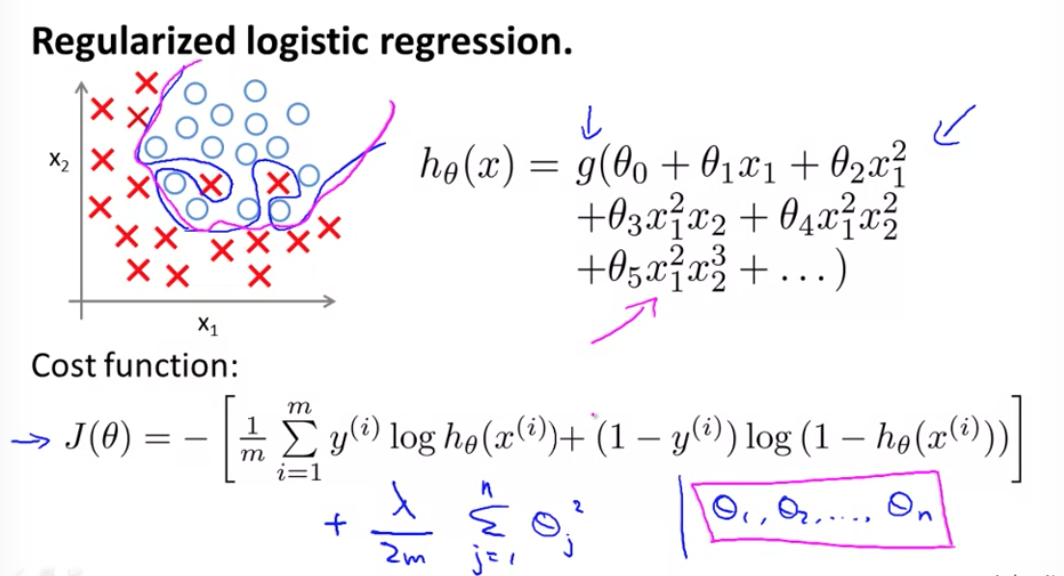

Parameter tuning:
- https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [52]:
classifier.coef_ #coefficients of feature w/ shape (1,n_features)

array([[ 2.06169269,  1.10338288]])

In [53]:
classifier.intercept_ #intercept aka bias

array([-0.92421803])

In [55]:
classifier.n_iter_ #number of iterations

array([5], dtype=int32)